<h1 align="center">Bayesian Statistics, Demo 1</h1>

<br>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import beta
from scipy.special import comb
import scipy

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.beta.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html

<h3 align="left">Task 4</h3>

Let us further investigate combining a binomial experiment with a Beta prior, and analyze the effect of the prior on the posterior. Assume that we have 16 trials with 5 successes. Examine how the parameters of the Beta prior influence the posterior in the following situations:

- $\theta \sim Beta(0.01, 0.01)$
- $\theta \sim Beta(1, 1)$
- $\theta \sim Beta(100, 100)$
- $\theta \sim Beta(10, 1)$

The likelihood function of the binomial distribution can be written as follows:

\begin{equation*}
    p(y|\theta) = \binom{n}{y} \theta^{y} (1 - \theta)^{n-y}.
\end{equation*}


The probability density function of the Beta distribution, for $\, x \in [0, 1] \, or \, x \in (0, 1) \,$ and $\, a, b > 0 \, \text{(shape parameters)} , \,$ can be written as follows:

\begin{equation*}
    f(x; \alpha, \beta) = \frac{1}{B(\alpha, \beta)} x^{\alpha-1} (1-x)^{\beta-1},
\end{equation*}


$$\text{where} \, \, \, B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}. \,$$


The posterior is $\, prior \,\, x  \,\, likelihood, \,$ which simplifies to

\begin{equation*}
    p(\theta|y) = Beta(a+y, b+n-y).
\end{equation*}

In [10]:
def beta_binom(a, b, y, n):
    """
    Compute prior (Beta), likelihood (Binomial) and posterior (Beta) functions.
    
    Args:
        a (float): Shape parameter for the Beta distribution representing prior beliefs.
        b (float): Shape parameter for the Beta distribution representing prior beliefs.
        y (int): Number of successes observed in the Binomial distribution.
        n (int): Total number of trials in the Binomial distribution.
        
    Returns:
        pandas.DataFrame: A dataframe containing 
    """
    # Note that NumPy's arange() function creates the values within half-open interval: 
    # [start, stop).
    theta = np.arange(0, 1+0.0001, 0.0001)
    
    # Prior is going to be the probability density function of the Beta distribution.
    # Note that one can use the ready-made beta function, which is available in the SciPy library.
    prior = (1/beta(a, b)) * theta**(a-1) * (1-theta)**(b-1)
    
    # Likelihood (Binomial)
    likelihood = comb(n, y) * theta**y * (1-theta)**(n-y)
    
    # p(theta|y)
    posterior = scipy.stats.beta.pdf(theta, a+y, b+n-y)
    
    df = pd.DataFrame({"Theta": theta,
                       "Prior": prior,
                       "Likelihood": likelihood,
                       "Posterior": posterior})
    
    return df

<br>

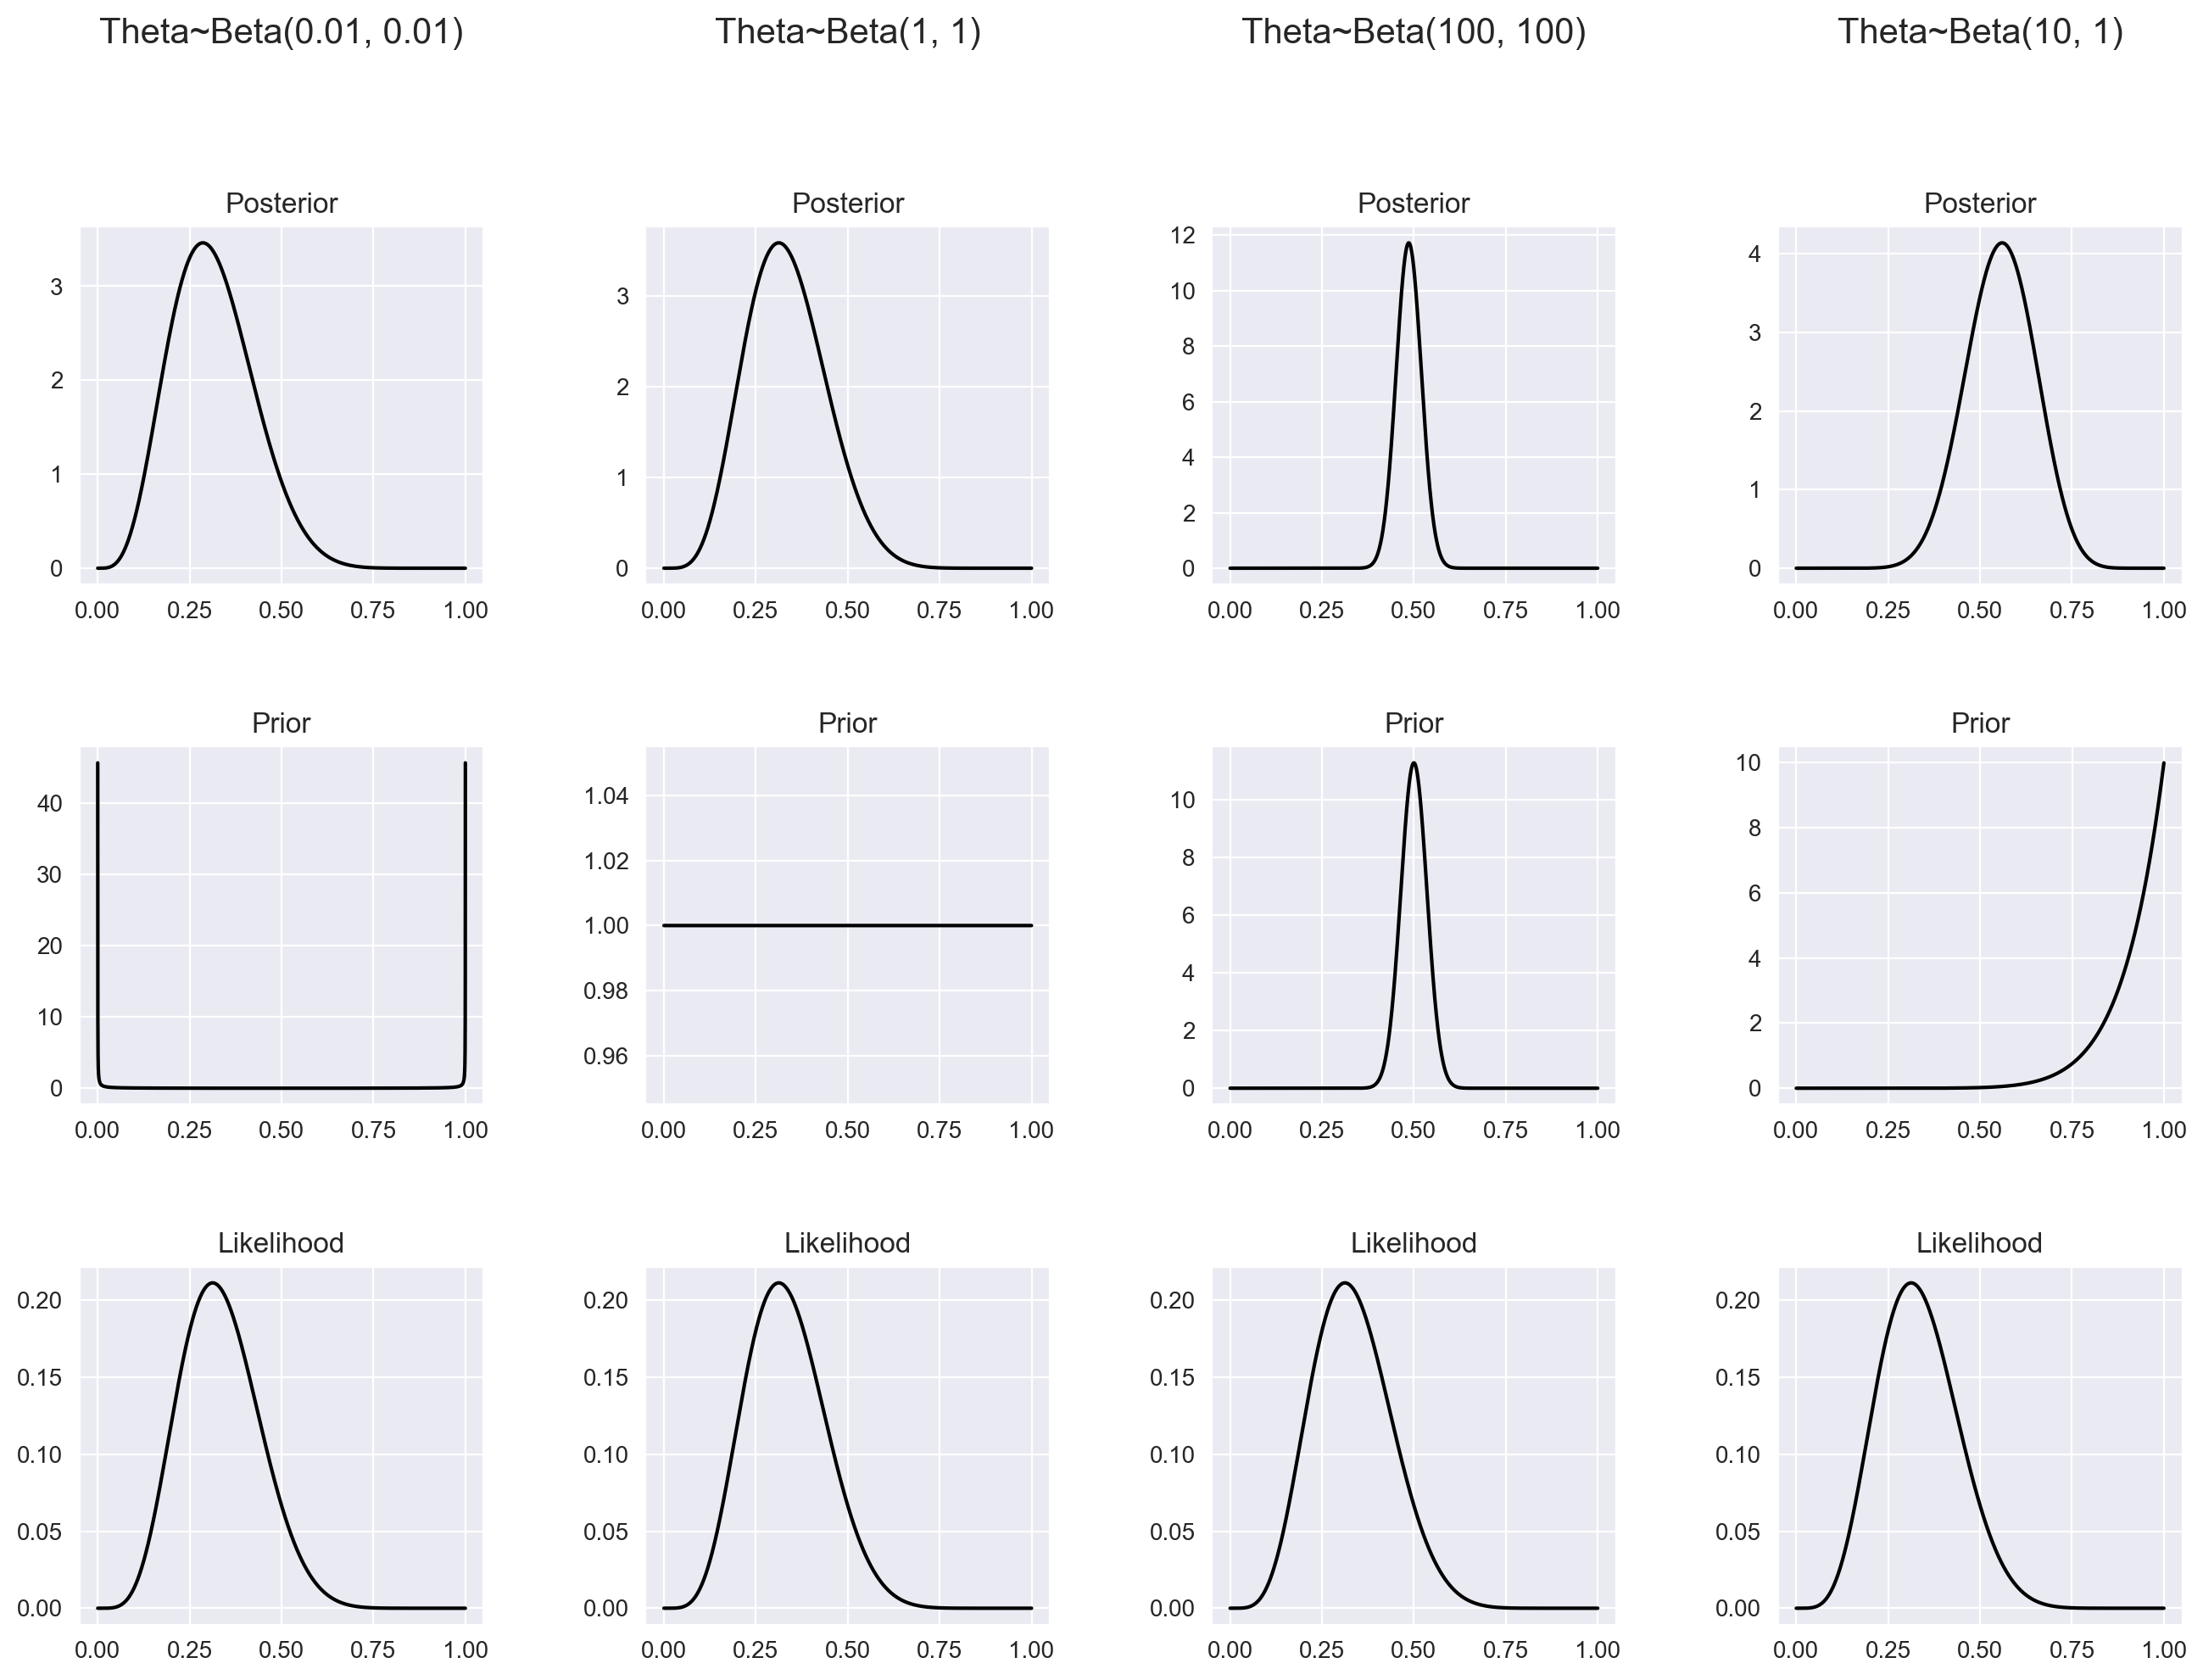

In [11]:
# Suppress divide by zero warning
np.seterr(divide="ignore")

theta = np.arange(0, 1+0.0001, 0.0001)
sns.set_style("darkgrid")
fig, axs = plt.subplots(nrows=3+1, 
                        ncols=4, 
                        figsize=(16, 12), 
                        dpi=200, 
                        gridspec_kw={"height_ratios":[0.02,1,1,1]})

# To introduce a 'column title' in a plot, an additional row can be added. 
# By setting the axes objects in the first row to be invisible while still incorporating titles, 
# a column title can be effectively displayed without showing the axes.
titles = ["Theta~Beta(0.01, 0.01)", 
          "Theta~Beta(1, 1)", 
          "Theta~Beta(100, 100)",
          "Theta~Beta(10, 1)"]
for i, ax in enumerate(axs[0]):             # axs[0] selects the first row of the subplot
    ax.axis("off")                          # Turn off the axes object of the ith column
    ax.set_title(titles[i], size=15)        # Set the title for the ith column
    
##### theta ~ Beta(0.01, 0.01) #####

d1 = beta_binom(0.01, 0.01, 5, 16)

axs[1, 0].plot(theta, np.array(d1["Posterior"]), "black", label="Posterior")
axs[1, 0].set_title("Posterior")

axs[2, 0].plot(np.arange(0+0.0001, 1, 0.0001), d1[~np.isinf(d1["Prior"])]["Prior"], "black")
axs[2, 0].set_title("Prior")

axs[3, 0].plot(theta, np.array(d1["Likelihood"]), "black")
axs[3, 0].set_title("Likelihood")

##### theta ~ Beta(1, 1) #####

d2 = beta_binom(1, 1, 5, 16)

axs[1, 1].plot(theta, np.array(d2["Posterior"]), "black")
axs[1, 1].set_title("Posterior")

axs[2, 1].plot(np.arange(0+0.0001, 1, 0.0001), d2[~np.isinf(d1["Prior"])]["Prior"], "black")
axs[2, 1].set_title("Prior")

axs[3, 1].plot(theta, np.array(d2["Likelihood"]), "black")
axs[3, 1].set_title("Likelihood")

##### theta ~ Beta(100, 100) #####

d3 = beta_binom(100, 100, 5, 16)

axs[1, 2].plot(theta, np.array(d3["Posterior"]), "black")
axs[1, 2].set_title("Posterior")

axs[2, 2].plot(np.arange(0+0.0001, 1, 0.0001), d3[~np.isinf(d1["Prior"])]["Prior"], "black")
axs[2, 2].set_title("Prior")

axs[3, 2].plot(theta, np.array(d3["Likelihood"]), "black")
axs[3, 2].set_title("Likelihood")

##### theta ~ Beta(10, 1) #####

d4 = beta_binom(10, 1, 5, 16)

axs[1, 3].plot(theta, np.array(d4["Posterior"]), "black")
axs[1, 3].set_title("Posterior")

axs[2, 3].plot(np.arange(0+0.0001, 1, 0.0001), d4[~np.isinf(d1["Prior"])]["Prior"], "black")
axs[2, 3].set_title("Prior")

axs[3, 3].plot(theta, np.array(d4["Likelihood"]), "black")
axs[3, 3].set_title("Likelihood")

fig.subplots_adjust(hspace=0.6, wspace=0.4);